# Univariate analysis on 2 categorical columns and 2 numerical columns of my own dataset

In [1]:
import pandas as pd

In [2]:
import seaborn as sns
sns.set_style("dark")

Steam data set is a dataset with data from the digital games store "Steam".

In [3]:
df = pd.read_csv('steam.csv', sep=',')

In [4]:
df.pop('appid')
# Convert english too boolean
df['english'] = df['english'].astype('bool')
# set release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# create 3 seperate platform fields instead of 1
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
# Split owners categorical value in two numerical values
df['owners_low'] = df['owners'].apply(lambda x: x.split('-')[0]).astype('int')
df['owners_high'] = df['owners'].apply(lambda x: x.split('-')[1]).astype('int')
# Create int out of data column
df['release_year'] = df['release_date'].dt.year
genres = df['genres'].apply(lambda x: x.split(';')[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              27075 non-null  object        
 1   release_date      27075 non-null  datetime64[ns]
 2   english           27075 non-null  bool          
 3   developer         27075 non-null  object        
 4   publisher         27075 non-null  object        
 5   platforms         27075 non-null  object        
 6   required_age      27075 non-null  int64         
 7   categories        27075 non-null  object        
 8   genres            27075 non-null  object        
 9   steamspy_tags     27075 non-null  object        
 10  achievements      27075 non-null  int64         
 11  positive_ratings  27075 non-null  int64         
 12  negative_ratings  27075 non-null  int64         
 13  average_playtime  27075 non-null  int64         
 14  median_playtime   2707

The median and owners filter are to make sure that games that nobody playes are excluded to get a more accurate representation of games

In [6]:
medianPlaytimeFilter = df['median_playtime']> 0.5
ownersFilter = df['owners_low'] > 20000 #lowest range above 0
noFreeGameFilter = df['price'] > 0.1
reviewFilter = df['positive_ratings'] > 5

Boxplot doesn't work, as a lot of games are free

<AxesSubplot:>

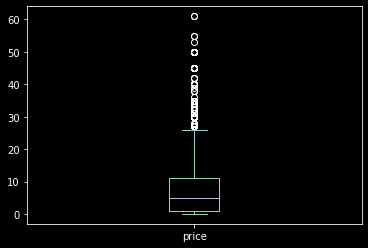

In [7]:
df['price'][ownersFilter][reviewFilter][medianPlaytimeFilter].plot(kind='box')

Filter out the free games

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/1341901083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[noFreeGameFilter][ownersFilter][reviewFilter][medianPlaytimeFilter]['price'].plot(kind='box')


<AxesSubplot:>

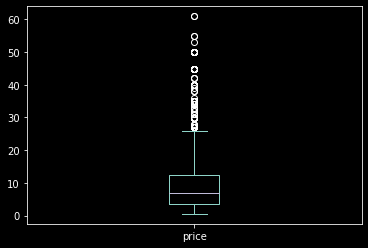

In [8]:

df[noFreeGameFilter][ownersFilter][reviewFilter][medianPlaytimeFilter]['price'].plot(kind='box')

Seems there are also a lot of cheap games

# Games that are played the most hours (median)

In [12]:
df[ownersFilter][medianPlaytimeFilter][reviewFilter][['name','median_playtime','average_playtime','owners']].sort_values('median_playtime',ascending=False).head(10)

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/3032881917.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ownersFilter][medianPlaytimeFilter][reviewFilter][['name','median_playtime','average_playtime','owners']].sort_values('median_playtime',ascending=False).head(10)


,name,median_playtime,average_playtime,owners
9201,The Abbey of Crime Extensum,190625,190625,50000-100000
1478,The Banner Saga: Factions,190489,95245,200000-500000
6014,The Secret of Tremendous Corporation,190445,95242,100000-200000
8969,PRICE,63490,63481,200000-500000
3969,Shroud of the Avatar: Forsaken Virtues,54618,54618,50000-100000
2435,X-Plane 11,44169,44169,100000-200000
12195,The Price of Freedom,36029,36029,50000-100000
8796,MANDAGON,31845,21233,200000-500000
2737,Heroine's Quest: The Herald of Ragnarok,31835,21247,500000-1000000
3152,The Desolate Hope,31751,21168,200000-500000


# Release year of a game

<AxesSubplot:>

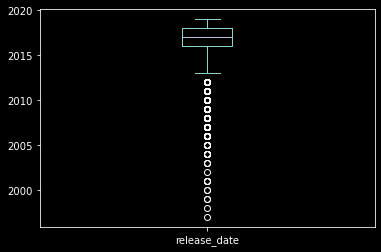

In [13]:
df['release_date'].dt.year.plot(kind='box')

Boxplot has many outliers, but why?

The lower values are due to Valves own games and the few games that were allowed on early that were quite rare

In [14]:
df.sort_values(by='release_year').head(5)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,windows,mac,linux,owners_low,owners_high,release_year
2685,Carmageddon Max Pack,1997-06-30,True,Stainless Games Ltd,THQ Nordic,windows,0,Single-player;Multi-player;Steam Trading Cards,Action;Indie;Racing,Racing;Action;Classic,...,13,13,50000-100000,5.99,True,False,False,50000,100000,1997
6,Half-Life,1998-11-08,True,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,...,1300,83,5000000-10000000,7.19,True,True,True,5000000,10000000,1998
1,Team Fortress Classic,1999-04-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,277,62,5000000-10000000,3.99,True,True,True,5000000,10000000,1999
4,Half-Life: Opposing Force,1999-11-01,True,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,624,415,5000000-10000000,3.99,True,True,True,5000000,10000000,1999
5,Ricochet,2000-11-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,...,175,10,5000000-10000000,3.99,True,True,True,5000000,10000000,2000


# Amount of games per year

<AxesSubplot:>

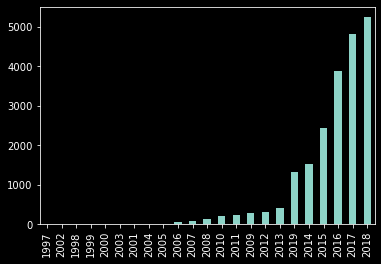

In [15]:
df['release_year'][df['positive_ratings'] > 5].value_counts().sort_values().plot(kind='bar')

In [18]:
df[reviewFilter]['developer'].value_counts().head(5)

Choice of Games               69
KOEI TECMO GAMES CO., LTD.    61
Ripknot Systems               42
RewindApp                     38
Humongous Entertainment       36
Nikita "Ghost_RUS"            34
For Kids                      32
Hosted Games                  31
EnsenaSoft                    31
MumboJumbo                    29
Name: developer, dtype: int64

# Games per combination of platforms they support

C:\Users\Stijn\AppData\Local\Temp/ipykernel_9580/2933264066.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ownersFilter][medianPlaytimeFilter]['platforms'].value_counts().sort_values().plot(kind='bar')


<AxesSubplot:>

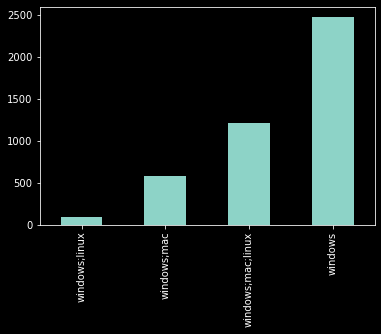

In [23]:
df[ownersFilter][medianPlaytimeFilter]['platforms'].value_counts().sort_values().plot(kind='bar')